In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics

In [2]:
gold_df = pd.read_csv('gld_price_data.csv')

In [3]:
gold_df.head()

,Date,SPX,GLD,USO,SLV,EUR/USD
0,1/2/2008,1447.160034,84.860001,78.470001,15.180,1.471692
1,1/3/2008,1447.160034,85.570000,78.370003,15.285,1.474491
2,1/4/2008,1411.630005,85.129997,77.309998,15.167,1.475492
3,1/7/2008,1416.180054,84.769997,75.500000,15.053,1.468299
4,1/8/2008,1390.189941,86.779999,76.059998,15.590,1.557099


In [4]:
gold_df.shape

(2290, 6)

In [5]:
gold_df.isnull().sum()

Date       0
SPX        0
GLD        0
USO        0
SLV        0
EUR/USD    0
dtype: int64

In [7]:
gold_df.describe()

,SPX,GLD,USO,SLV,EUR/USD
count,2290.000000,2290.000000,2290.000000,2290.000000,2290.000000
mean,1654.315776,122.732875,31.842221,20.084997,1.283653
std,519.111540,23.283346,19.523517,7.092566,0.131547
min,676.530029,70.000000,7.960000,8.850000,1.039047
25%,1239.874969,109.725000,14.380000,15.570000,1.171313
50%,1551.434998,120.580002,33.869999,17.268500,1.303297
75%,2073.010070,132.840004,37.827501,22.882500,1.369971
max,2872.870117,184.589996,117.480003,47.259998,1.598798


In [11]:
gold_df['Date'] = pd.to_datetime(gold_df['Date'])

In [12]:
correlation = gold_df.corr()

<Axes: >

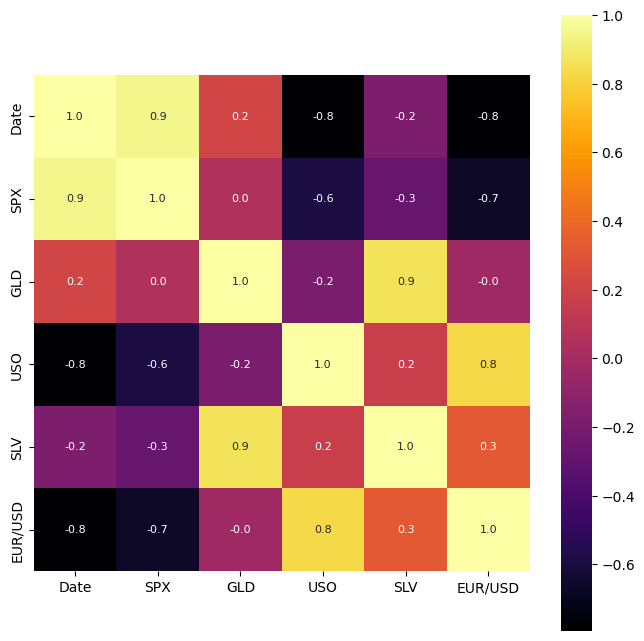

In [13]:
plt.figure(figsize = (8,8))
sns.heatmap(correlation, cbar=True, square=True, fmt='.1f',annot=True, annot_kws={'size':8}, cmap='inferno')

C:\Users\Vansh\AppData\Local\Temp\ipykernel_21304\3699717838.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(gold_df['GLD'],color='blue')


<Axes: xlabel='GLD', ylabel='Density'>

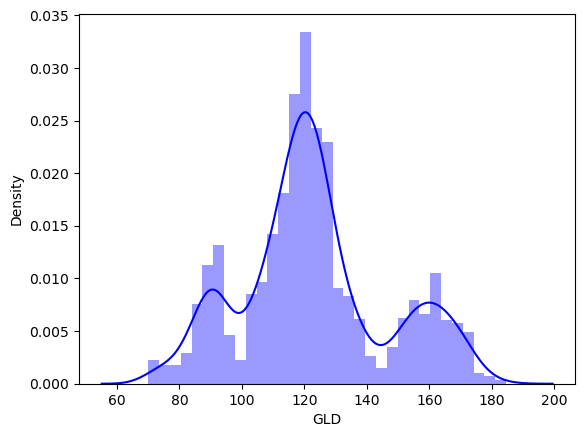

In [16]:
sns.distplot(gold_df['GLD'],color='blue')

In [17]:
X = gold_df.drop(['Date','GLD'],axis=1)
Y = gold_df['GLD']

In [18]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state=2)

In [19]:
regressor = RandomForestRegressor(n_estimators=100)

In [20]:
regressor.fit(X_train,Y_train)

RandomForestRegressor()

In [21]:
test_data_prediction = regressor.predict(X_test)

In [22]:
print(test_data_prediction)

[168.54409898  82.06419979 115.66269997 127.73230048 120.75700081
 154.7288977  150.29239835 126.15390023 117.46319877 126.02720068
 116.74290079 171.88300094 141.21189882 167.62939889 115.20230036
 117.40290052 137.84340287 170.01380116 158.81130347 158.4035987
 155.15469993 125.43780032 175.82750011 157.22120364 125.25410061
  93.65349978  76.94400023 120.30070021 119.08229955 167.50679931
  88.15260056 125.33260002  91.13680092 117.54560032 121.19799915
 137.21470132 115.545501   115.30010068 147.02939924 107.18110096
 104.61420263  87.23319798 126.49020053 117.9829999  152.32699893
 119.65320056 108.38070036 108.10069844  93.31690054 127.0922976
  75.37300033 113.66309944 121.52179987 111.28119902 118.89379895
 120.47479932 160.12829967 166.84370068 147.05819684  85.8344986
  94.15930043  86.79009872  90.67090011 118.84370071 126.42890031
 127.68360004 170.24140039 122.27039908 117.19739892  98.36729989
 168.26470189 143.15599798 131.96320196 121.06870225 120.85699939
 120.13440035

In [23]:
error_score = metrics.r2_score(Y_test, test_data_prediction)
print("R squared error : ", error_score)

R squared error :  0.9891041127285092


In [24]:
Y_test = list(Y_test)

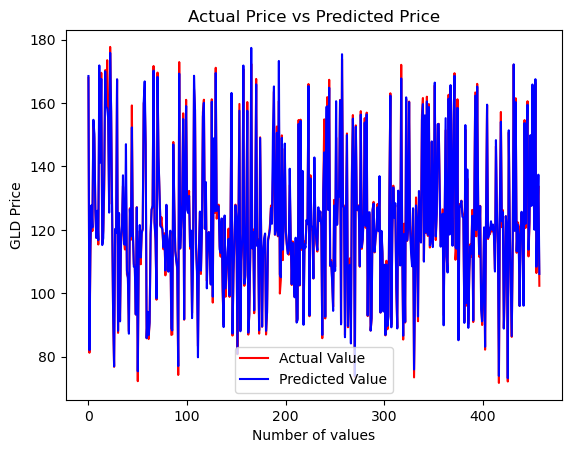

In [27]:
plt.plot(Y_test, color='red', label = 'Actual Value')
plt.plot(test_data_prediction, color='blue', label='Predicted Value')
plt.title('Actual Price vs Predicted Price')
plt.xlabel('Number of values')
plt.ylabel('GLD Price')
plt.legend()
plt.show()

Pretty Accurate